# 過去ログからエントリポイントを研究

### システムパスに一つ上のディレクトリ .. を追加

In [1]:
import sys
sys.path.append('..')

## ライブラリのインポート

In [2]:
import datetime

from matplotlib import (
    dates as mdates,
    font_manager as fm,
    pyplot as plt,
    ticker as ticker,
)
import numpy as np
import pandas as pd

from funcs.plots import getMajorXTicks
from funcs.preprocs_no_qt import get_ohlc4analysis

## 過去ログ (OHLC) の読み込み

In [3]:
file_csv = '../ohlc1m/ohlc1m_8306_20250305.csv'
df = pd.read_csv(file_csv)
df

,銘柄名称,市場名称,足種,日付,時刻,始値,高値,安値,終値,出来高,...,H_Low,H_Close,TREND,EP,AF,PSAR,Period,Diff,Slope,IQR
0,三菱ＵＦＪフィナンシャルＧ,東証,1M,2025/03/04,15:30,1932,1932,1932,1932,5010700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2025/03/05,09:00,1910,1920,1910,1920,3277200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2025/03/05,09:01,1919,1922.5,1918,1918.5,603600,...,1915.00,1919.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2025/03/05,09:02,1918.5,1919,1914.5,1917.5,469500,...,1914.50,1917.38,-1.0,1914.5,0.02,1914.5,0.0,0.0,NaN,3.5
4,NaN,NaN,NaN,2025/03/05,09:03,1918,1921,1917.5,1918.5,375000,...,1917.31,1918.75,1.0,1921.0,0.02,1914.5,0.0,0.0,NaN,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,NaN,NaN,NaN,2025/03/05,15:27,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,2025/03/05,15:28,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,2025/03/05,15:29,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,2025/03/05,15:30,1927.5,1927.5,1927.5,1927.5,6089900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Matplotlib で扱いやすいように整形

In [4]:
df = get_ohlc4analysis(df)
df

,Open,High,Low,Close,Volume,H_Open,H_High,H_Low,H_Close,TREND,EP,AF,PSAR,Period,Diff,Slope,IQR
2025-03-05 09:00:00,1910.0,1920.0,1910.0,1920.0,3277200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-05 09:01:00,1919.0,1922.5,1918.0,1918.5,603600.0,1915.00,1922.5,1915.00,1919.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-05 09:02:00,1918.5,1919.0,1914.5,1917.5,469500.0,1917.25,1919.0,1914.50,1917.38,-1.0,1914.5,0.02,1914.5,0.0,0.0,NaN,3.5
2025-03-05 09:03:00,1918.0,1921.0,1917.5,1918.5,375000.0,1917.31,1921.0,1917.31,1918.75,1.0,1921.0,0.02,1914.5,0.0,0.0,NaN,3.5
2025-03-05 09:04:00,1918.5,1918.5,1912.5,1913.5,315700.0,1918.03,1918.5,1912.50,1915.75,-1.0,1918.5,0.02,1921.0,0.0,0.0,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-05 15:26:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-05 15:27:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-05 15:28:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-05 15:29:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## チャート

### フォント設定

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 14

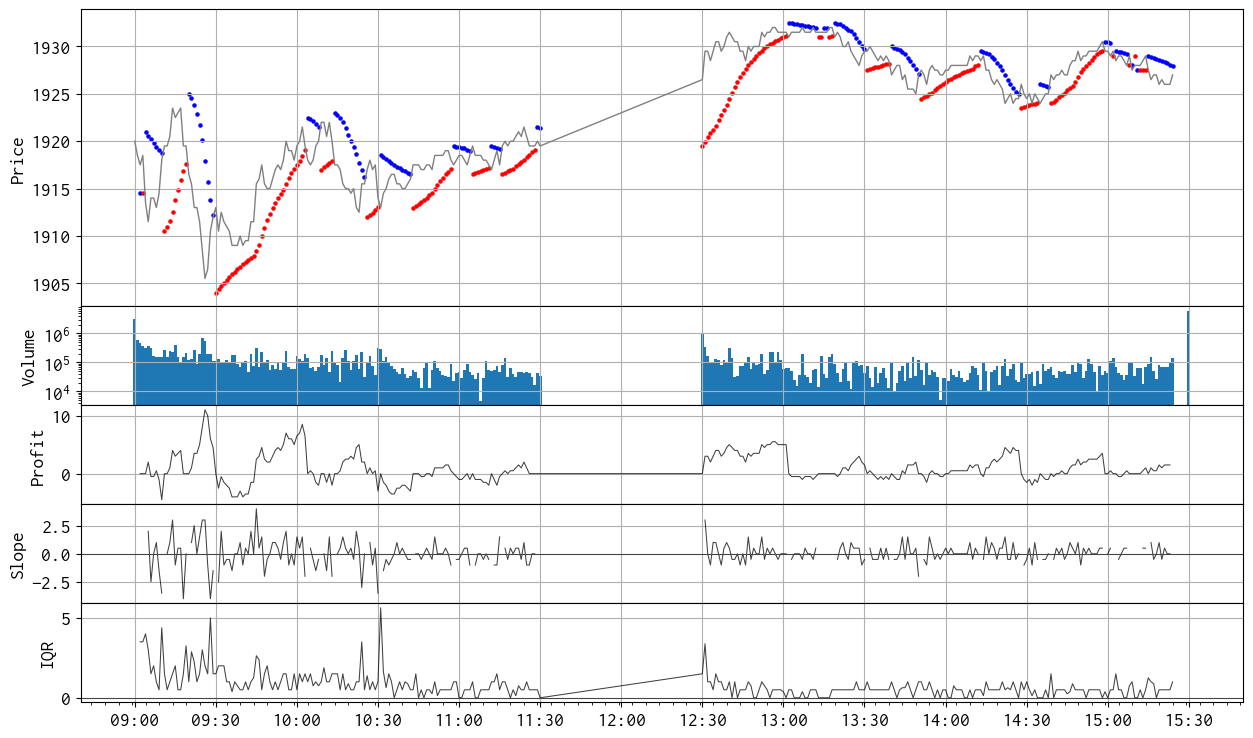

In [26]:
fig = plt.figure(figsize=(15, 9))
ax = dict()

n = 5
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

ax[0].plot(
    df['Close'],
    linewidth=1,
    color='gray',
)

df_bear = df[df['TREND'] < 0]
df_bull = df[df['TREND'] > 0]

# PSAR bear - Downward trend
ax[0].scatter(
    x=df_bear.index,
    y=df_bear['PSAR'],
    color='blue',
    s=5,
)

# PSAR bull - Upward trend
ax[0].scatter(
    x=df_bull.index,
    y=df_bull['PSAR'],
    color='red',
    s=5,
)

tick_position, tick_labels = getMajorXTicks(df)
ax[0].set_xticks(ticks=tick_position, labels=tick_labels,)
ax[0].xaxis.set_minor_locator(mdates.MinuteLocator(interval=5))

ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax[0].set_ylabel('Price')

td = datetime.timedelta(minutes=1)
ax[1].bar(
    df.index,
    df['Volume'],
    width=td,
)
ax[1].set_yscale('log')
ax[1].set_ylabel('Volume')

# Diff
ax[2].plot(
    df['Diff'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[2].set_ylabel('Profit')

# Slope
ax[3].plot(
    df['Slope'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[3].axhline(
    0,
    linewidth=0.75,
    color='#444',
)
ax[3].set_ylabel('Slope')

# IQR
ax[4].plot(
    df['IQR'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[4].axhline(
    0,
    linewidth=0.75,
    color='#444',
)
ax[4].set_ylabel('IQR')

plt.show()